In [74]:
# Import dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay

In [75]:
# Read in csv data
data = Path('3X-Tripled_Dataset_With_Unique_Employee_IDs- tai.csv')
work_life_df = pd.read_csv(data)
work_life_df.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,43,7,2,Medium,Depression,No,Decrease,4,Satisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,48,4,1,Medium,Anxiety,No,Increase,2,Unsatisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,43,11,5,Medium,Anxiety,No,No Change,4,Satisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,59,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,57,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,50,3,4,High,NaN,No,Increase,2,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,25,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,22,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,45,4,2,High,NaN,Yes,Decrease,1,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,45,6,1,Low,Depression,Yes,Decrease,1,Unsatisfied,1,Weekly,Poor,North America


# Random Forest Model 1

In [76]:
# Define features and the target
features = ['Industry', 'Job_Role', 'Hours_Worked_Per_Week', 'Work_Location', 
            'Mental_Health_Condition', 'Physical_Activity', 'Sleep_Quality', 
            'Satisfaction_with_Remote_Work']
target = 'Stress_Level'

In [77]:
# Encode categorical features and target
label_encoders = {}
for column in features + [target]:
    le = LabelEncoder()
    work_life_df[column] = le.fit_transform(work_life_df[column])
    label_encoders[column] = le  # Store the encoder for each column

In [78]:
# Create features(X) and target(y)
X = work_life_df[features]
y = work_life_df[target]

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [81]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.5383333333333333
Confusion Matrix:
 [[567 220 233]
 [245 500 258]
 [227 202 548]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.55      1020
           1       0.54      0.50      0.52      1003
           2       0.53      0.56      0.54       977

    accuracy                           0.54      3000
   macro avg       0.54      0.54      0.54      3000
weighted avg       0.54      0.54      0.54      3000



### Results Interpretation
Accuracy: 54%
    - The model's accuracy is 54%, which indicates it correctly classified the stress levels for 54% of the test samples which is relatively low and suggests that the model might struggle to accurately predict stress levels with the current features or data distribution.

Confusion Matrix:
The confusion matrix provides a breakdown of predictions for each stress level:
Class 0 (e.g., Low): Out of 1020 instances, 550 were correctly classified as Class 0, with some misclassified as Class 1 and Class 2.
Class 1 (e.g., Medium): Out of 1003 instances, 518 were correctly classified, with some misclassified as Class 0 and Class 2.
Class 2 (e.g., High): Out of 977 instances, 547 were correctly classified, with some misclassified as Class 0 and Class 1.

### Calculate Feature Importance

In [82]:
# Create a Feature Importance Visualization Graph
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


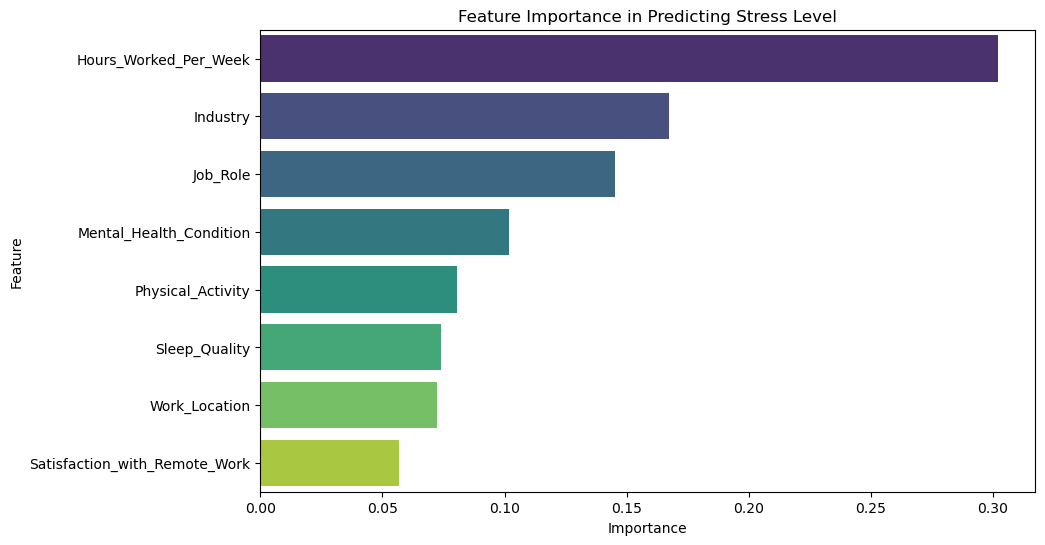

In [83]:
# Plot Feature Importances Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance in Predicting Stress Level")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Feature Importance
The bar chart of feature importances shows which features contribute most to the model's predictions:
Top Features:
Hours_Worked_Per_Week is the most important feature, suggesting that the amount of work time has a significant impact on stress levels.
Industry and Job_Role are also important, indicating that occupation and work environment may influence stress levels.
Less Important Features:
Satisfaction_with_Remote_Work and Sleep_Quality are among the least influential features in this model, suggesting they may have less impact on predicting stress levels based on this dataset.

# Random Forest Model 2 with all variables as features 

In [84]:
# Define the features and the target
features = ['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience', 
            'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 
            'Work_Life_Balance_Rating', 'Mental_Health_Condition', 
            'Access_to_Mental_Health_Resources', 'Productivity_Change', 
            'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 
            'Company_Support_for_Remote_Work', 'Physical_Activity', 
            'Sleep_Quality', 'Region']
target = 'Stress_Level'


In [85]:
# Encode categorical features
label_encoders = {}
for column in features:
    if work_life_df[column].dtype == 'object':
        le = LabelEncoder()
        work_life_df[column] = le.fit_transform(work_life_df[column])
        label_encoders[column] = le  


In [86]:
# Separate features(X) and target(y)
X = work_life_df[features]
y = work_life_df[target]

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Model Accuracy: 0.9763333333333334
Random Forest Confusion Matrix:
 [[1005    4   11]
 [  10  974   19]
 [   5   22  950]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1020
           1       0.97      0.97      0.97      1003
           2       0.97      0.97      0.97       977

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



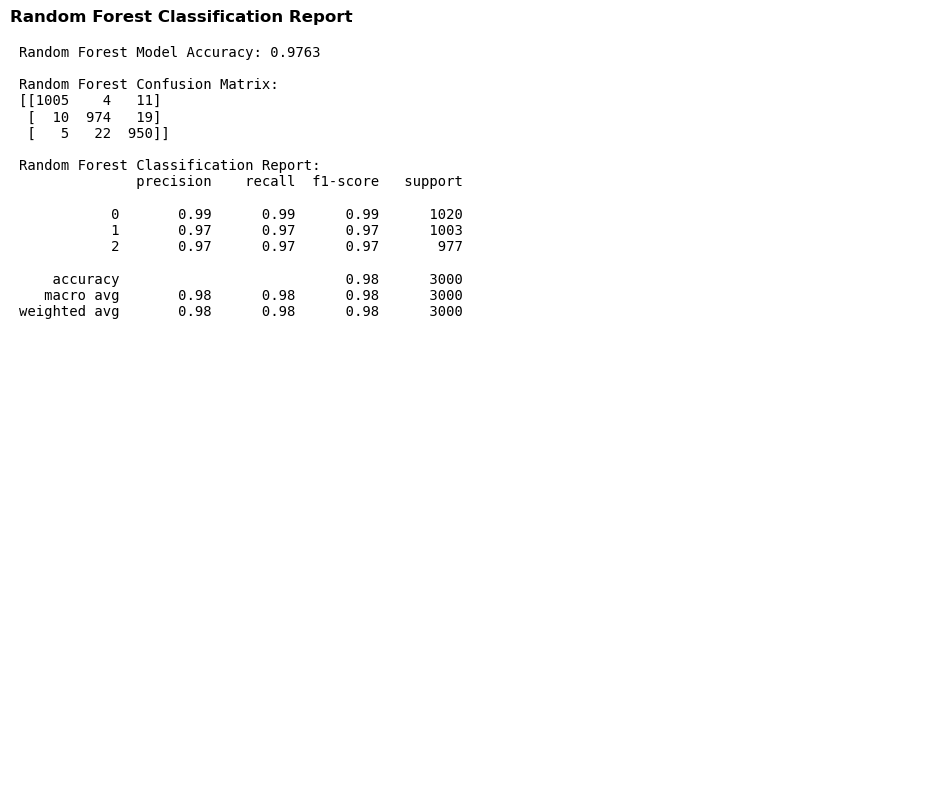

In [89]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", class_report)

# Concatenating accuracy, confusion matrix, and classification report into one string
overall_report = f"Random Forest Model Accuracy: {accuracy:.4f}\n\n"
overall_report += f"Random Forest Confusion Matrix:\n{conf_matrix}\n\n"
overall_report += f"Random Forest Classification Report:\n{class_report}"

# Plot 
plt.figure(figsize=(12, 10))
plt.text(0.01, 0.98, overall_report, fontsize=10, va='top', ha='left', fontfamily='monospace')
plt.axis('off')
plt.title("Random Forest Classification Report", fontsize=12,fontweight='bold', color='black', loc='left' )

# Save plot as an image
# plt.savefig("Random_Forest_classification_report.png", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

## Calculate and Visualize Feature Importance

In [90]:
# Create a Feature Importance Visualization Graph
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

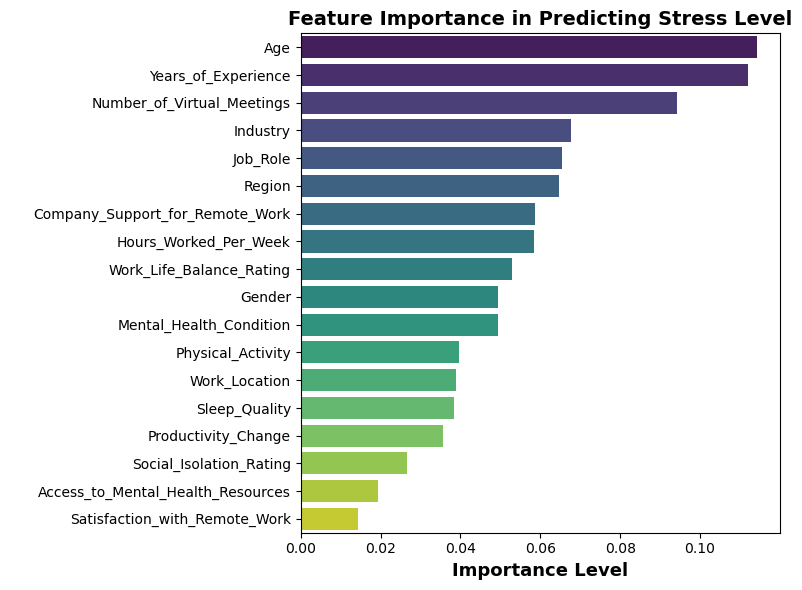

In [91]:
# Plot Feature Importances Graph
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance in Predicting Stress Level", fontsize=14, fontweight='bold')
plt.xlabel("Importance Level", fontsize=13, fontweight='bold')
plt.ylabel("Features", color='white', fontsize=13, fontweight='bold')
plt.tick_params(colors='black') 
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.tight_layout()
# plt.savefig('random_forestfeature_importance_graph')
plt.show()

### Partial Dependence Plot

In [21]:
pip install matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


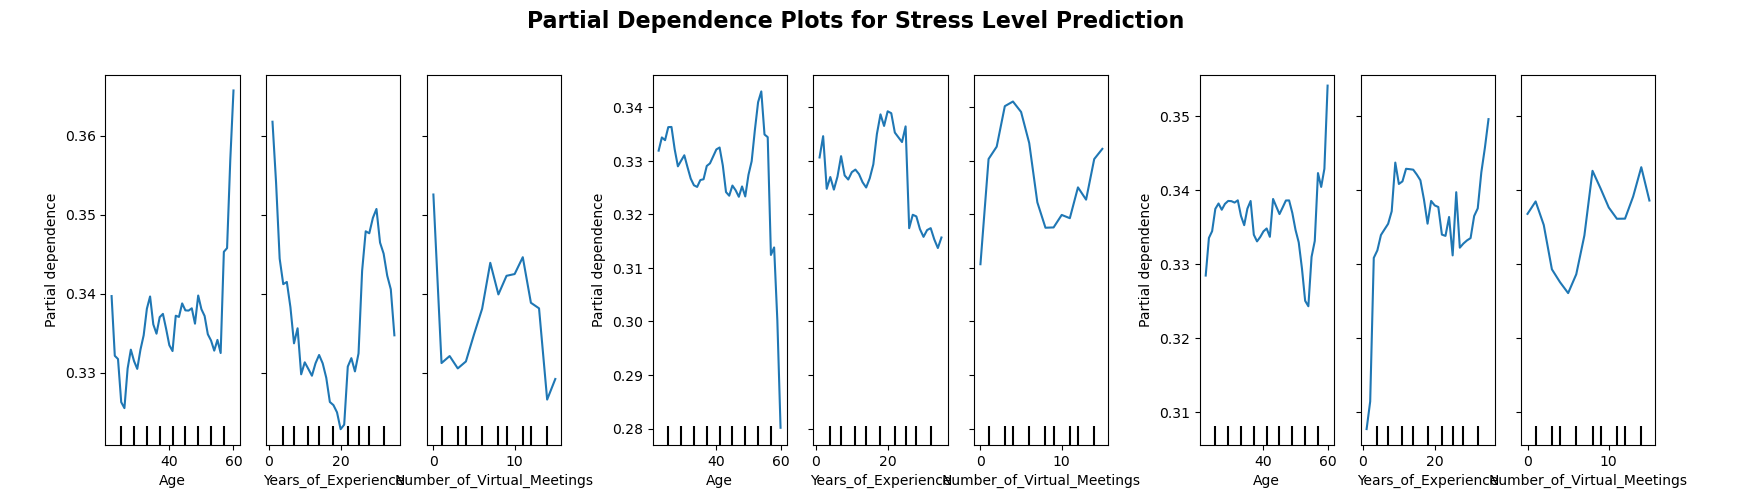

In [92]:
# Select features for PDP visualization
pdp_features = ['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings']

# Plot Partial Dependence for each feature with respect to each stress level
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
fig.patch.set_alpha(0)  # Set the figure background transparent

# Loop through each target class for stress level
for i, ax in enumerate(axes):
    display = PartialDependenceDisplay.from_estimator(
        rf_model, X_train, pdp_features, 
        target=i,  # Single target class at a time
        grid_resolution=50, ax=ax,
        n_jobs=-1  # Parallel processing
    )
    
    # Set title for each subplot
    ax.set_title(f"Partial Dependence for Stress Level {i} (Low, Medium, High)", color='white', fontsize=14, fontweight='bold')

    # Set x and y-axis labels
    ax.set_xlabel(ax.get_xlabel(), color='white', fontsize=13, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), color='white', fontsize=13, fontweight='bold')
    
    # Set x and y tick parameters
    ax.tick_params(axis='x', colors='white', labelsize=12, rotation=45)
    ax.tick_params(axis='y', colors='white', labelsize=12)

    # Set line color to neon light blue
    for line in ax.get_lines():
        line.set_color('#00FFFF') 
    
    # Make borders of the plot white and bold
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
        spine.set_linewidth(1.5)

# title and layout adjustment
plt.suptitle("Partial Dependence Plots for Stress Level Prediction", fontsize=16, color='black', fontweight='bold')
plt.subplots_adjust(top=0.85, hspace=0.3) 

# Save
plt.savefig("partial_dependence_plots.png", transparent=True, dpi=300)
plt.show()

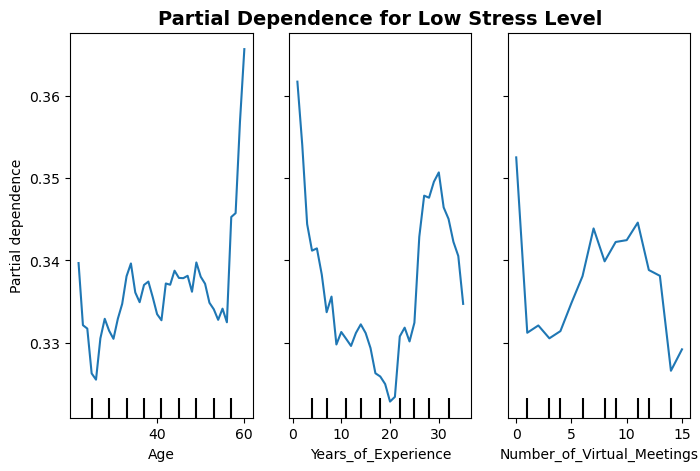

In [94]:
# Select features for PDP visualization
pdp_features = ['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings']

# Plot Partial Dependence for Stress Level 0 (Low)
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_alpha(0)  
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, pdp_features, 
    target=0,  
    grid_resolution=50, ax=ax,
    n_jobs=-1 
)
ax.set_title("Partial Dependence for Low Stress Level", color='black', fontsize=14, fontweight='bold')
plt.savefig("pdp_stress_level_low.png", transparent=True, dpi=300)
plt.show()

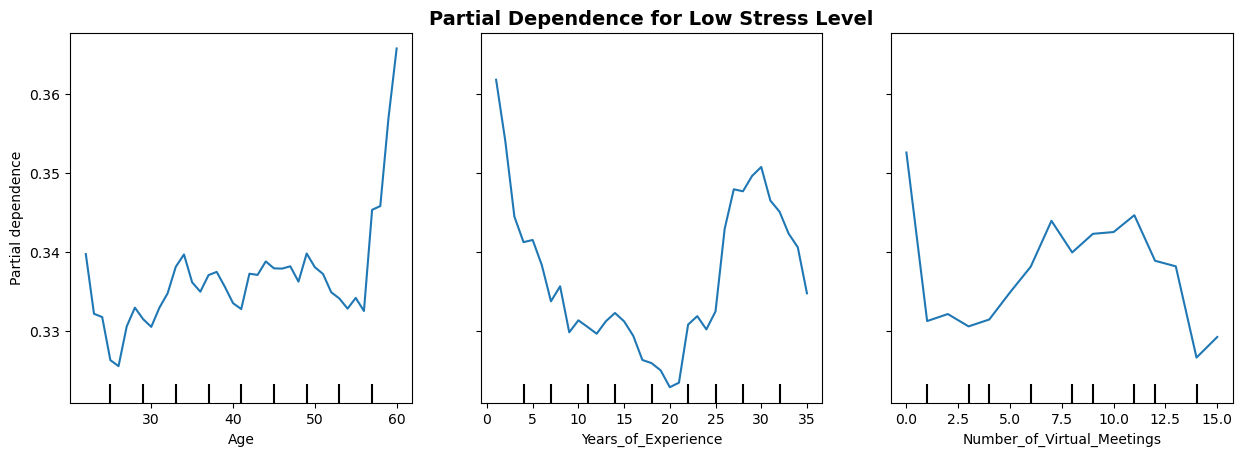

In [95]:
# Selected features for visualization
pdp_features = ['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings']

# Plot Partial Dependence for Low Stress Level 
fig, ax = plt.subplots(figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, pdp_features, 
    target=0,  
    grid_resolution=50, ax=ax,
    n_jobs=-1 
)

# Customize the plot for Stress Level 0
ax.set_title("Partial Dependence for Low Stress Level", color='Black', fontsize=14, fontweight='bold')
ax.set_xlabel(ax.get_xlabel(), color='black', fontsize=13, fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), color='black', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', colors='black', labelsize=12, rotation=45)  
ax.tick_params(axis='y', colors='black', labelsize=12)

for line in ax.get_lines():
    line.set_color('#00FFFF') 
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)


plt.subplots_adjust(top=0.85)
plt.savefig("partial_dependence_stress_low_level.png", dpi=300)
plt.show()

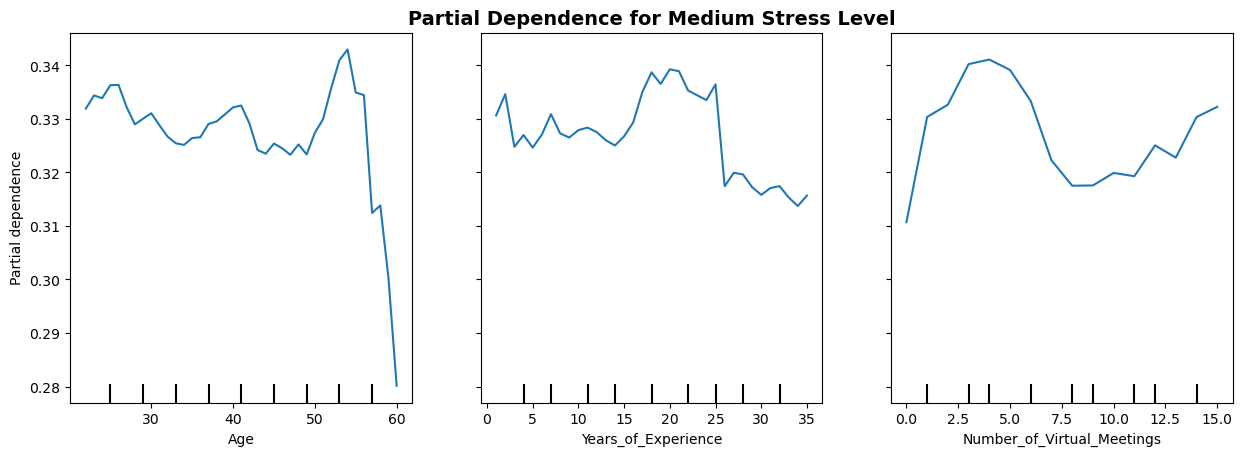

In [97]:
# Selected features for visualization
pdp_features = ['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings']

# Plot Partial Dependence for Medium Stress Level 
fig, ax = plt.subplots(figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, pdp_features, 
    target=1,  
    grid_resolution=50, ax=ax,
    n_jobs=-1  
)

# Customize the plot for Stress Level 1
ax.set_title("Partial Dependence for Medium Stress Level", color='black', fontsize=14, fontweight='bold')
ax.set_xlabel(ax.get_xlabel(), color='black', fontsize=13, fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), color='black', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', colors='black', labelsize=12, rotation=45) 
ax.tick_params(axis='y', colors='black', labelsize=12)

for line in ax.get_lines():
    line.set_color('#00FFFF')  
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.subplots_adjust(top=0.85)
plt.savefig("partial_dependence_stress_medium_level.png", dpi=300)
plt.show()

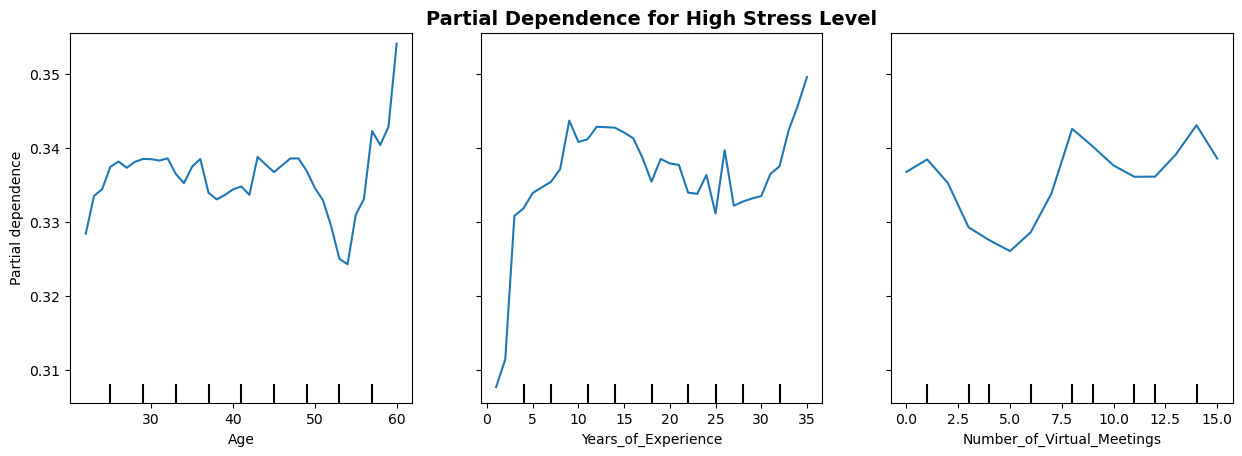

In [98]:
# Selected features for visualization
pdp_features = ['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings']

# Plot Partial Dependence for High Stress Level
fig, ax = plt.subplots(figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, pdp_features, 
    target=2, 
    grid_resolution=50, ax=ax,
    n_jobs=-1  
)

# Customize the plot for Stress Level 1
ax.set_title("Partial Dependence for High Stress Level", color='black', fontsize=14, fontweight='bold')
ax.set_xlabel(ax.get_xlabel(), color='black', fontsize=13, fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), color='black', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', colors='black', labelsize=12, rotation=45) 
ax.tick_params(axis='y', colors='black', labelsize=12)

for line in ax.get_lines():
    line.set_color('#00FFFF')  
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.subplots_adjust(top=0.85)
plt.savefig("partial_dependence_stress_high_level.png", dpi=300)
plt.show()

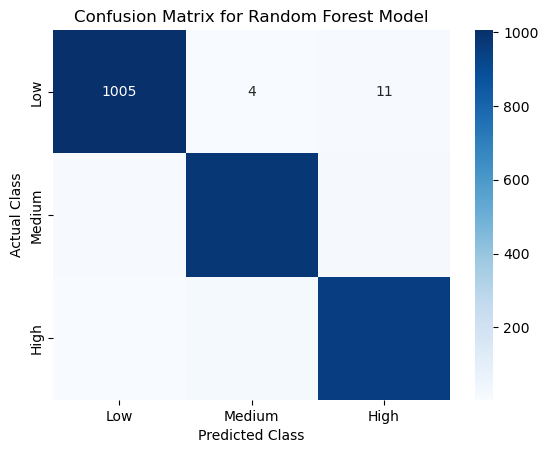

In [75]:
# Create a confusion maxtrix visualization 
from sklearn.metrics import confusion_matrix
class_labels = ['Low', 'Medium', 'High']  

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [76]:
# Print Confusion matrix results
print("Confusion Matrix Values:\n", conf_matrix_rf)

Confusion Matrix Values:
 [[1005    4   11]
 [  10  974   19]
 [   5   22  950]]


### Confusion Matrix Results Explained
- [[1005    4   11]   # Low: 1005 correct, 4 misclassified as Medium, 11 as High

-  [  24  937   31]   # Medium: 24 misclassified as Low, 937 correct, 31 as High
 
-  [  12   20 1003]]  # High: 12 misclassified as Low, 20 as Medium, 1003 correct

## Random Forest Model 3

In [77]:
# Define the features and the target
features = ['Age', 'Industry', 'Years_of_Experience','Number_of_Virtual_Meetings']

target = 'Stress_Level'

# Encode categorical features
label_encoders = {}
for column in features:
    if work_life_df[column].dtype == 'object':
        le = LabelEncoder()
        work_life_df[column] = le.fit_transform(work_life_df[column])
        label_encoders[column] = le  

# Separate features(X) and target(y)
X = work_life_df[features]
y = work_life_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", class_report)

Random Forest Model Accuracy: 0.957
Random Forest Confusion Matrix:
 [[984  25  11]
 [ 21 952  30]
 [ 13  29 935]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1020
           1       0.95      0.95      0.95      1003
           2       0.96      0.96      0.96       977

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [79]:
# Define the features and the target
features = ['Age', 'Years_of_Experience','Number_of_Virtual_Meetings']

target = 'Stress_Level'

# Encode categorical features
label_encoders = {}
for column in features:
    if work_life_df[column].dtype == 'object':
        le = LabelEncoder()
        work_life_df[column] = le.fit_transform(work_life_df[column])
        label_encoders[column] = le  

# Separate features(X) and target(y)
X = work_life_df[features]
y = work_life_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", class_report)

Random Forest Model Accuracy: 0.874
Random Forest Confusion Matrix:
 [[914  51  55]
 [ 85 845  73]
 [ 68  46 863]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1020
           1       0.90      0.84      0.87      1003
           2       0.87      0.88      0.88       977

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



In [80]:
# Define the features and the target
features = ['Age', 'Years_of_Experience']

target = 'Stress_Level'

# Encode categorical features
label_encoders = {}
for column in features:
    if work_life_df[column].dtype == 'object':
        le = LabelEncoder()
        work_life_df[column] = le.fit_transform(work_life_df[column])
        label_encoders[column] = le  

# Separate features(X) and target(y)
X = work_life_df[features]
y = work_life_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", class_report)

Random Forest Model Accuracy: 0.512
Random Forest Confusion Matrix:
 [[521 243 256]
 [238 510 255]
 [237 235 505]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.51      0.52      1020
           1       0.52      0.51      0.51      1003
           2       0.50      0.52      0.51       977

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



In [81]:
# Define the features and the target
features = []

target = 'Stress_Level'

# Encode categorical features
label_encoders = {}
for column in features:
    if work_life_df[column].dtype == 'object':
        le = LabelEncoder()
        work_life_df[column] = le.fit_transform(work_life_df[column])
        label_encoders[column] = le  

# Separate features(X) and target(y)
X = work_life_df[features]
y = work_life_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", class_report)

Random Forest Model Accuracy: 0.3556666666666667
Random Forest Confusion Matrix:
 [[431 329 260]
 [379 371 253]
 [404 308 265]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.42      0.39      1020
           1       0.37      0.37      0.37      1003
           2       0.34      0.27      0.30       977

    accuracy                           0.36      3000
   macro avg       0.35      0.35      0.35      3000
weighted avg       0.35      0.36      0.35      3000

